# Predicting Bank Customer Churn - Final Report
-------------------


-----

# Business Problem
----

### The bank is losing customers and is interested in gaining insights regarding why they are leaving and if they can predict who is at risk of leaving so they can offer them incentives to stay.

# Client
----
### Bank

# Objective
----

### My objective is to gain insight into why customers are leaving and build a model to predict which customers are at risk of leaving the bank.

# Overview of Analytical Pipeline
---- 

This project follows a typical data science pipeline. 

1. First approach in solving the problem is obtaining the relevant data.
2. Cleaning the data is the next step. This includes checking for null values, imputing missing values and checking column names
3. Next, we explore the data to gain insights into our dataset and what it contains. This includes looking for outliers or unusual data as well as using a correlation matrix to understand the relationship between the response and predictor variables. 
4. Modeling using Machine Learning gives us our predictive power on whether the bank will lose a customer or not. 
5. Lastly, we interpret the results and see what can we conlcude about bank customers leaving the bank. For example, what feature variable was most indicative of customers leaving the bank?

# 1. Obtaining the Data

In [40]:
# Load the required libraries for data manipulation and data visualization 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler # Which one should i use? 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline 

In [7]:
# Load the dataset from local directory into a Pandas dataframe called 'df'
df = pd.read_csv('Churn_Modelling.csv', index_col=None)

In [8]:
# View the shape of the data using .shape
df.shape

(10000, 14)

# 2. Cleaning the Data
----

In real world data, cleaning requires a lot of effort and can be a very long process. However, this dataset from Kaggle is very clean and does not have any missing values but I still want to check it to make sure everything looks good and that the values match the column names appropriately. I dropped the 'RowNumber' column as it is redundant here! 


In [9]:
# Check to see if there are any null values in our dataset 
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
# View the data 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#Drop the RowNumber column as it is redundant 
df.drop('RowNumber', axis = 1, inplace=True)

In [12]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Feature Conversion

The purpose of converting the 'Geography' column and 'Gender' column into numerical values is because during modelling, some actions can not be performed on categorical values. Here, I will convert the 'Geography' column into 3 numerical values and 'Gender' column into 2 numerical values. 


In [13]:
print(df['Gender'].value_counts())
print(df['Geography'].value_counts())

Male      5457
Female    4543
Name: Gender, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [14]:
df['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2], inplace=True)
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0


##### Data Rearrangement

For visual purposes, I like to move the response variable, in this case 'Exited', to the left side of the table. I find it quicker to view it this way, and also makes the dataset splitting into train/test set easier later on.


In [15]:
first_column = df['Exited']
df.drop('Exited', axis=1,inplace=True)
df.insert(0, 'Exited', first_column)
df.head()


,Exited,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88
1,0,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58
2,1,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57
3,0,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63
4,0,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10


##### Outlier Detection

Check for outliers in the data by using the .describe() method and looking for any extreme values in the min and max fields of the output. There seems to be no outliers in this data. 


In [16]:
df.describe()

,Exited,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.203700,1.569094e+07,650.528800,0.746300,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,0.402769,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,0.000000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,0.000000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,0.000000,1.569074e+07,652.000000,0.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,0.000000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,1.000000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


# 3. Exploring the Data
----

### Count plot -- Customer breakdown by geography
--- 

The plots show the count of customers from France, Spain and Germany. There are twice as many customers from France than from Spain or Germany.

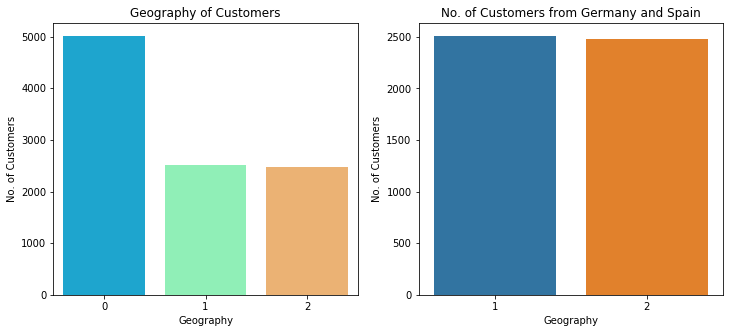

In [17]:
# Customer breakdown by Geography

fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.countplot(df['Geography'], ax=axs[0],palette='rainbow')
axs[0].set_xlabel('Geography')
axs[0].set_ylabel('No. of Customers')
axs[0].set_title('Geography of Customers')

sns.countplot(df[(df['Geography'] == 2) | (df['Geography'] == 1)]['Geography'], ax= axs[1])#, #palette='glow")
axs[1].set_xlabel('Geography')
axs[1].set_ylabel('No. of Customers')
axs[1].set_title('No. of Customers from Germany and Spain')

plt.show()

### Count plot  -- Customers who exited bank by geography
----

The plot shows the breakdown of customers who exited from each country. We can see Germany had the most customers who exited followed by France and Spain.

- 0 = France, 1 = Germany and 2 = Spain


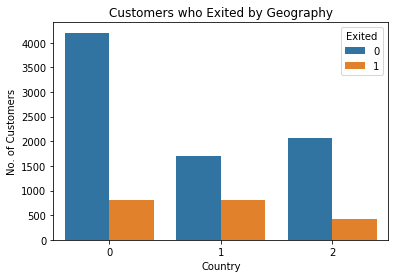

In [18]:
sns.countplot(df['Geography'], hue=df['Exited'])
plt.xlabel('Country')
plt.ylabel('No. of Customers')
plt.title('Customers who Exited by Geography')
plt.show()

### Count plot  --  Customers who exited by Gender and Geography
----

The first plot shows the breakdown of customers who exited by their gender and the rest of the plots look at customers by gender who exited from France, Germany and Spain.

From these plots, we can see that there were a higher number of female customers who exited, France had the highest number of female customers who exited the bank and Germany had the highest number of Male customers who exited the bank.

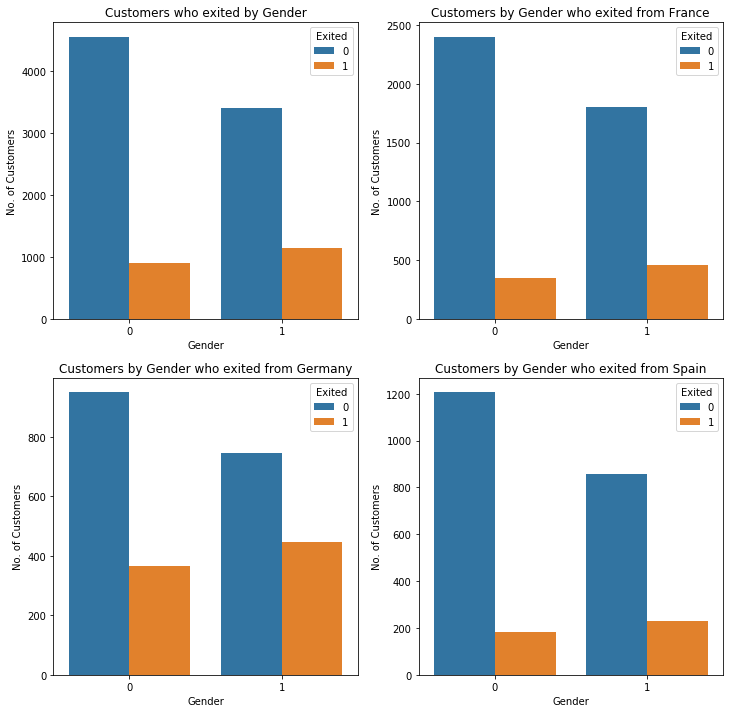

In [22]:
# Customers who exited by Gender and Geography

fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(df['Gender'], hue=df['Exited'],ax = axs[0,0])
axs[0,0].set_title('Customers who exited by Gender')
axs[0,0].set_xlabel('Gender')
axs[0,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 0]['Gender'], hue=df['Exited'],ax=axs[0,1])
axs[0,1].set_title('Customers by Gender who exited from France')
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 1]['Gender'], hue=df['Exited'], ax=axs[1,0])
axs[1,0].set_title('Customers by Gender who exited from Germany')
axs[1,0].set_xlabel('Gender')
axs[1,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 2]['Gender'], hue=df['Exited'], ax=axs[1,1])
axs[1,1].set_title('Customers by Gender who exited from Spain')
axs[1,1].set_xlabel('Gender')
axs[1,1].set_ylabel('No. of Customers')

plt.show()

### Count plot  -- Breakdown of customers by gender and country
---
#####  0 = France, 1 = Germany and 2 = Spain

The plots look at the gender breakdown of all customers and customers from each country. We can see that France has the highest female and male customers

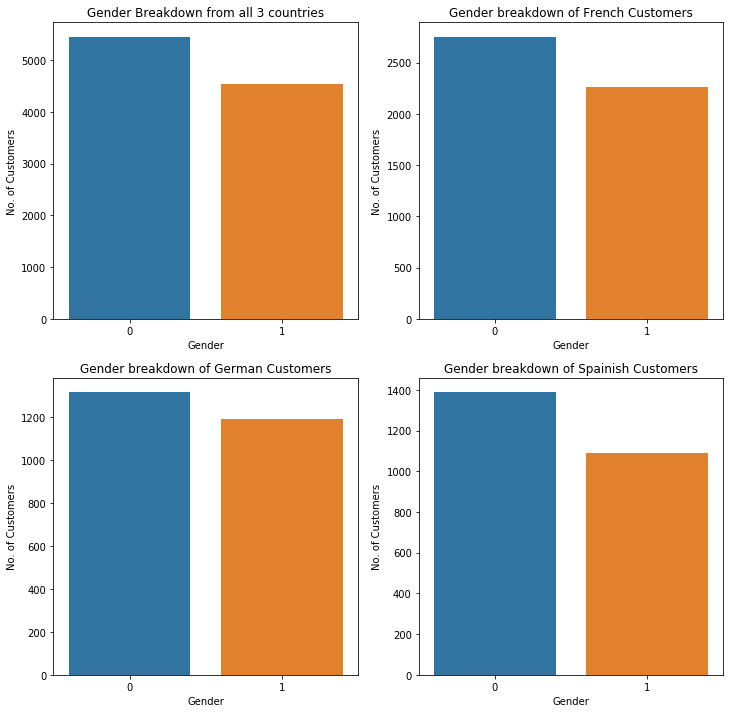

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

sns.countplot(df['Gender'], ax = axs[0,0])
axs[0,0].set_title('Gender Breakdown from all 3 countries')
axs[0,0].set_xlabel('Gender')
axs[0,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 0]['Gender'], ax=axs[0,1])
axs[0,1].set_title('Gender breakdown of French Customers')
axs[0,1].set_xlabel('Gender')
axs[0,1].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 1]['Gender'], ax=axs[1,0])
axs[1,0].set_title('Gender breakdown of German Customers')
axs[1,0].set_xlabel('Gender')
axs[1,0].set_ylabel('No. of Customers')

sns.countplot(df[df['Geography'] == 2]['Gender'], ax=axs[1,1])
axs[1,1].set_title('Gender breakdown of Spainish Customers')
axs[1,1].set_xlabel('Gender')
axs[1,1].set_ylabel('No. of Customers')

plt.show()

### Count plot  --  Customers who exited by credit card 
--- 

The plot shows whether customers had a credit card and if they exited. Customers who had a credit card exited more than customers who did not possess a credit card

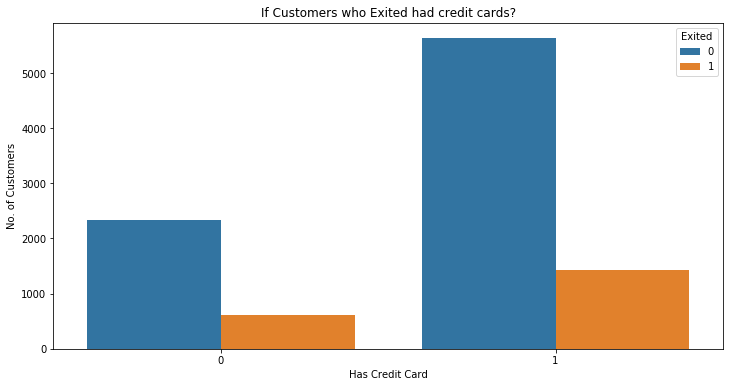

In [58]:
# Customers who exited by Gender 

plt.figure(figsize=(12,6))

sns.countplot(df['HasCrCard'], hue=df['Exited'])
plt.title('If Customers who Exited had credit cards?')
plt.xlabel('Has Credit Card')
plt.ylabel('No. of Customers')

plt.show()

### Distribution Plot --  Distribution of credit score by gender
--- 

The plots look at the credit score distribution of female and male customers. There is no significant difference in the distribution of both gender's credit scores

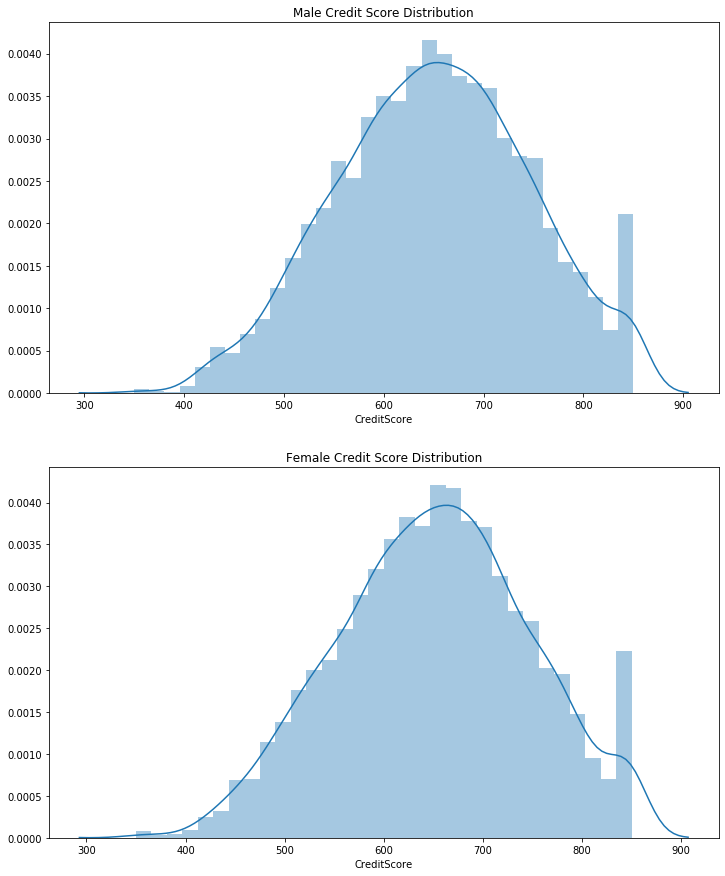

In [24]:
fig, axs = plt.subplots(2, figsize=(12,15))

sns.distplot(df[df['Gender'] == 0]['CreditScore'], ax=axs[0])
axs[0].set_title('Male Credit Score Distribution')

sns.distplot(df[df['Gender'] == 1]['CreditScore'], ax=axs[1])
axs[1].set_title('Female Credit Score Distribution')

plt.show()

### Distribution Plot --  Distribution of credit score by customers who did and didn't exit bank
---- 

The plots show the credit score distribution of customers who exited and did not exit. Customers who exited had a roughly lower average credit score. 

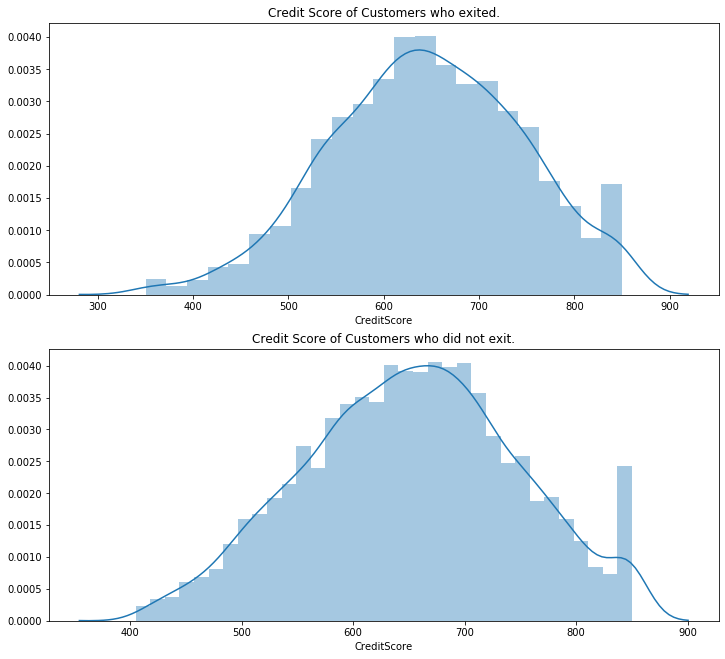

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(12,11))

sns.distplot(df[df['Exited'] == 1]['CreditScore'], ax=axs[0])
axs[0].set_title('Credit Score of Customers who exited.')

sns.distplot(df[df['Exited'] == 0]['CreditScore'], ax=axs[1])
axs[1].set_title('Credit Score of Customers who did not exit.')

plt.show()

### Distribution Plot --  Age distribution of customers who did and didn't exit bank
---- 

The plots show the age distribution of customers who exited and who did not exit. The age distribution of customers who exited looks close to normally distributed while the age distribution of customers who did not exit is positively skewed.

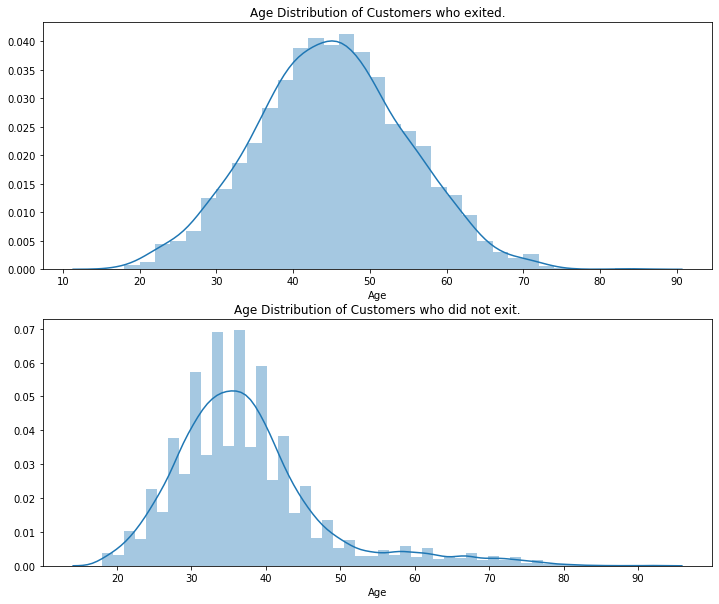

In [27]:
fig, axs = plt.subplots(2,1, figsize=(12,10))

sns.distplot(df[df['Exited'] == 1]['Age'], hist=True, kde=True, ax=axs[0])
axs[0].set_title('Age Distribution of Customers who exited.')
                        
sns.distplot(df[df['Exited'] == 0]['Age'], hist=True, kde=True, ax=axs[1])
plt.title('Age Distribution of Customers who did not exit.')

plt.show()

### Scatter Plot - Age vs Credit Score (hue: Exited)
---- 

The plot below is a scatterplot of Credit Score and Age with the points color coded by whether customers exited or not. It can be seen that the majority of the customers who exited were between 40 and 60 years old

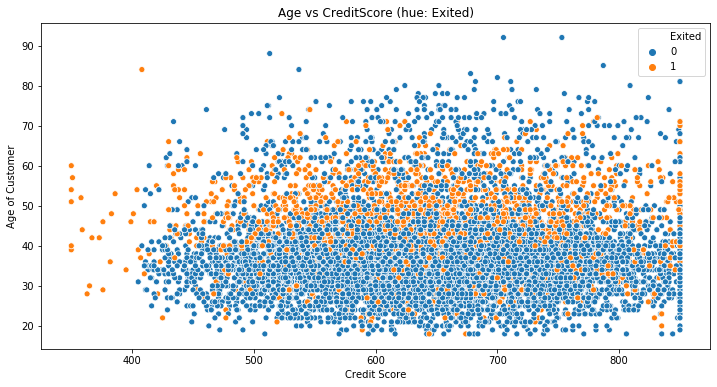

In [21]:
plt.figure(figsize=(12,6))

sns.scatterplot(df['CreditScore'],df['Age'], hue=df['Exited'])
plt.title('Age vs CreditScore (hue: Exited)')
plt.xlabel('Credit Score')
plt.ylabel('Age of Customer')
plt.show()

# Statistical Overview 
---

- Dataset has 10000 entries 
- 79.6% of customers stayed at the bank while 20.4% of the customers exited the bank. 

In [29]:
# Look at the proportion of customers who exited and didn't exit. 
# 79.6% of customers stayed at the bank while 20.4% of the customers exited the bank. 
exit_rate = df['Exited'].value_counts() / len(df)
exit_rate

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [30]:
sum_exit_rate = df.groupby('Exited').mean()
sum_exit_rate

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,
0,1.569117e+07,651.853196,0.731257,0.427477,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,0.805106,0.559156,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [31]:
round(df.mean(), 2)

Exited                    0.20
CustomerId         15690940.57
CreditScore             650.53
Geography                 0.75
Gender                    0.45
Age                      38.92
Tenure                    5.01
Balance               76485.89
NumOfProducts             1.53
HasCrCard                 0.71
IsActiveMember            0.52
EstimatedSalary      100090.24
dtype: float64

## Statistical Analysis 
--- 

In [60]:
# Separate the exited and non-exited customers from the dataset into two groups  

# Cust_exit contains the first group; customers who exited
cust_exit = df[df['Exited'] == 1]

# Cust_no_exit contains the first group; customers who didn't exited
cust_no_exit = df[df['Exited'] == 0]

In [33]:
# Extract and store the len of the two groups of data. 

n1 = len(cust_exit)

n0 = len(cust_no_exit)

## Correlation Matrix and Heatmap

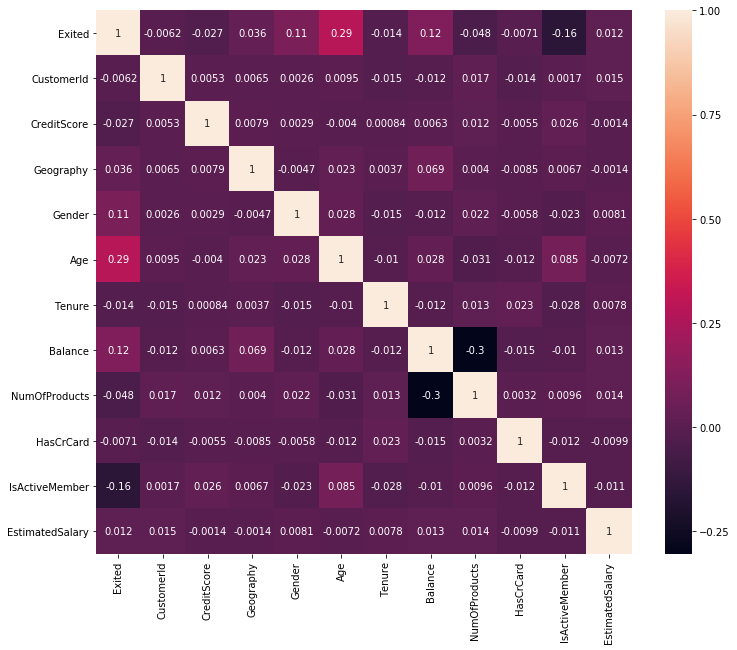

In [34]:
# Create a heatmap to show the corr values between variables
corr = df.corr()
# add the values
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show()

## Credit Score Distributions (All vs Exited vs Not Exited)

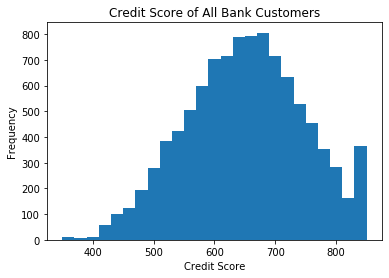

In [35]:
# Credit Score Distribution of All Customers
df['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of All Bank Customers').set_xlabel('Credit Score')
plt.show()

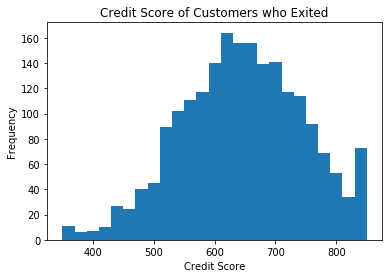

In [36]:
# Credit Score Distribution of Customers who exited

cust_exit['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of Customers who Exited').set_xlabel('Credit Score')
plt.show()

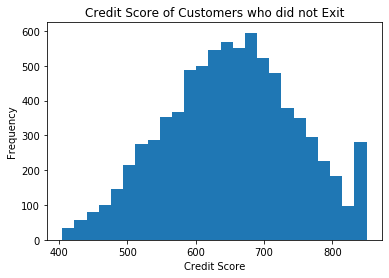

In [61]:
# Credit Score Distribution of Customers who did not exit

cust_no_exit['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of Customers who did not Exit').set_xlabel('Credit Score')
plt.show()

# T-Test
----
**A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.**

## One Sample T-Test 

A one-sample t-test is used to test whether a population mean is significantly different from some hypothesized value. We are going to test to see whether the average credit score of customers that exited differs from the entire bank population. 

Hypothesis Testing: Is there significant difference in the means of credit score between customers who exited and the entire bank customers? 

**Null Hypothesis:** The null hypothesis would be there there is **no** difference in credit score between customers who exited and all bank customers. 

**Alternate Hypothesis:** The alternative hypothesis would be that there **is** a difference in credit scores between customers who exited and all bank customers. 

In [38]:
# Look at the means of the credit score of customers who exited and all bank customers 
mean_all_cust  =   df['CreditScore'].mean()
mean_cs_exit = cust_exit['CreditScore'].mean()

print('The mean credit score of all bank customers is ' + str(mean_all_cust))
print('The mean credit score of bank customers who exited is ' + str(mean_cs_exit))

The mean credit score of all bank customers is 650.5288
The mean credit score of bank customers who exited is 645.3514972999509


## Conduct the T-Test
----
Let's conduct a t-test at 95% confidence interval and see if the null hypothesis (sample comes from the same distribution as the bank customers population) is correctly rejected. We can conduct a one sample t-test using the stats.ttest_1samp() function:

In [41]:
stats.ttest_1samp(a=  cust_exit['CreditScore'], # Sample of Credit Scores of Customer who Exited the bank
                  popmean = mean_all_cust) # Mean of the population 

Ttest_1sampResult(statistic=-2.3291906789604067, pvalue=0.019946347165310532)

The test result shows the test statistic 't' is equal to -2.329. T is simply the calculated difference represented in units of standard error and tells us how much the sample mean deviates from the null hypothesis. We can reject the null hypothesis if the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom. We can check the quantiles with stats.t.ppf():

T is simply the calculated difference represented in units of standard error. The greater the magnitude of T, the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. The closer T is to 0, the more likely there isn't a significant difference.

In [42]:
degree_of_freedom = len(df[df['Exited']==1])

left_quartile = stats.t.ppf(0.025,degree_of_freedom)  # Left Quartile

right_quartile = stats.t.ppf(0.975,degree_of_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(left_quartile))
print ('The t-distribution right quartile range is: ' + str(right_quartile))

The t-distribution left quartile range is: -1.96112925575354
The t-distribution right quartile range is: 1.9611292557535396


A p-value of 0.019946347165310532 means we'd expect to see data as extreme as our sample due to chance way less than 5% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture bank customer's credit score mean of 650.5288:

In [43]:
sigma = cust_exit['CreditScore'].std()/math.sqrt(degree_of_freedom + 1)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = degree_of_freedom,                     # Degrees of freedom
                 loc = mean_cs_exit, # Sample mean
                 scale= sigma)

(640.9933876070597, 649.709606992842)

## One Sample T-Test Summary 
--- 

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean credit score of bank customers who exited and the entire bank customer population. The low P-value of 0.019946347165310532 at a 5% confidence interval is a good indicator to reject the null hypothesis. 

# 4. Modeling the Data
---- 

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between customers who will exit and who will not exit. Below is a table of the classifiers used and their respective AUC-ROC scores. 

| Classifier | AUC-ROC Score  |
|------|------|
| Decision Tree  | 0.77 |
| AdaBoost  | 0.77 |
| Random Forest  | 0.77 |
| SVM | 0.76 |
| Logistic Regression  | 0.68|


The best model performance out of the 5 classifiers (Logistic Regression, AdaBoost, Decision Tree, Random Forest, Support Vector Machine) was of the three tree based methods (AdaBoost, Decision Tree, Random Forest). I would recommend using the **Decision Tree model** as it is the least computationally expensive. Furthermore, one of the things that Decision Trees allows you to do is assess which features in your dataset were the most important and we can visualize each features contribution as it can be seen below in the notebook. For our dataset, the features ‘Age’ and ‘NumOfProducts’ contributed to almost **80%** of all features importance. 

**Base Rate Model** 
- The Logistic Regression Classifier was chosen as the base rate model. A base rate model is a model that is used for reference to compare how better another model is against it. 

**Model Evaluation**

This dataset is an example of a class imbalance problem because of the uneven distribution of customers who did and did not exit the bank. The SMOTEENN method was used to tackle this which combines over- and under-sampling using SMOTE and Edited Nearest Neighbours

In this case, evaluating our model’s algorithm based on accuracy is the wrong thing to measure. We will have to take into consideration the False Positive and False Negative Errors and use that as a metric to evaluate our model's performance. 

False Positives (Type I Error): You predict that the customers will leave, but do not.

False Negatives (Type II Error): You predict that the customer will not leave, but does leave.

----


###### Checking for Class imbalance

- 20% Exited (1)
- 80% Non Exited (0)

In [44]:
print("1 : ", len(df[df.Exited == 1]) / 10000)
print("0 : ",len(df[df.Exited == 0]) / 10000)

1 :  0.2037
0 :  0.7963


###### Drop unwanted columns
Created a numpy array X which contains all of the columns of df except for Surname, Exited and Customer Id. Exited is the response variable while Surname and Customer ID don't give us any useful information. Hence, they are noise so dropped and not included in training the model


In [45]:
X = df.drop(['Surname','Exited', 'CustomerId'], axis=1)
y = df['Exited']
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


##### Standardize data

Though the need to standardize the data isn't so great in classification problems, I did standardize the data using the robust scaler method as it also deals with outliers in the dataset. 


In [46]:
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

##### Split the data into training and test sets


In [47]:
# Split the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(8000, 10)
(8000,)
(2000, 10)
(2000,)


### Base Classifier 
- Use Logistic Regression as the base classifier 
- Training Logistic Regression Classifier and fit on X_train, y_train (data before SMOTEENN)


In [48]:
log_reg = LogisticRegression(class_weight='balanced', 
                             C=0.01)

log_reg.fit(X_train,y_train)
print("\n\n -- Logistic Regression Model --")
log_reg_auc_score = roc_auc_score(y_test,log_reg.predict(X_test))
print("-- Logistic Regression Model AUC = %2.2f --" % log_reg_auc_score)
print(classification_report(y_test, log_reg.predict(X_test)))





 -- Logistic Regression Model --
-- Logistic Regression Model AUC = 0.68 --
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1593
           1       0.36      0.65      0.47       407

    accuracy                           0.70      2000
   macro avg       0.63      0.68      0.63      2000
weighted avg       0.78      0.70      0.72      2000



##### Handle class imbalance 

- Used SMOTEENN which combines over- and under-sampling using SMOTE and Edited Nearest Neighbours


In [49]:
# class imbalance 
from imblearn.combine import SMOTEENN
print(X_train.shape)
print(y_train.shape)
print(sum(y_train == 1))
print(sum(y_train == 0))

sm_upsample = SMOTEENN(sampling_strategy='all',random_state = 123) 
X_res, y_res = sm_upsample.fit_resample(X_train, y_train)

print('Shape of X after over sampling ', X_res.shape)
print('Shape of y after over sampling', y_res.shape)
print(sum(y_res == 1))
print(sum(y_res == 0))

(8000, 10)
(8000,)
1630
6370
Shape of X after over sampling  (9860, 10)
Shape of y after over sampling (9860,)
5551
4309


## Perform Hyper-Parameter Tuning for other classifiers


In [50]:
# -- Hyper-parameter tuning for Decision Tree Classifier -- 

classifier=DecisionTreeClassifier()
grid_param = {'criterion': ['gini', 'entropy'],
             'class_weight': ['balanced', 'None'],
             'max_depth' : [None, 2, 4, 6, 8, 10],
             'min_weight_fraction_leaf': [0.001, 0.01 , 0.1]}
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='roc_auc',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_res, y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)




{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'min_weight_fraction_leaf': 0.001}


In [51]:
# -- Hyper-parameter tuning for AdaBoostClassifier -- 


classifier=AdaBoostClassifier()
grid_param = {'n_estimators': [200, 400, 600, 800, 1000],
             'learning_rate': [0.0001, 0.001, 0.01, 0.1]}

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='roc_auc',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_res, y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)


{'learning_rate': 0.1, 'n_estimators': 1000}


In [53]:
# -- Hyper-parameter tuning for Random Forest Classifier -- 

classifier=RandomForestClassifier()

grid_param = {'n_estimators': [100, 500, 1000],
             'class_weight': ['balanced', 'None'],
             'max_depth' : [None, 2, 4, 6, 8,  10],
             'min_samples_split': [10, 20, 50, 100],
             'min_weight_fraction_leaf': [0.001, 0.01 , 0.1]}

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='roc_auc',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_res, y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.001, 'n_estimators': 1000}


In [54]:
# -- Hyper-parameter tuning for Support Vector Machine Classifier -- 

from sklearn.svm import SVC

classifier=SVC()

grid_param = {'C': [0.0001, 0.001, 0.01, 0.1],
             'class_weight': ['balanced', 'None']}

gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='roc_auc',
                     cv=10,
                     n_jobs=-1)

gd_sr.fit(X_res, y_res)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'C': 0.1, 'class_weight': 'balanced'}


## Decision Tree vs Random Forest vs AdaBoost vs SVM


In [55]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Training Decision Tree Classifier
dt = DecisionTreeClassifier(class_weight = 'balanced',
                                criterion = 'gini', 
                                max_depth = 8, # was 10 used 8 
                                min_weight_fraction_leaf = 0.01) # was 0.001 used 0.01

dt.fit(X_res,y_res)
print ("\n\n ---Decision Tree Model---")
dt_auc_score = roc_auc_score(y_test, dt.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_auc_score)
print(classification_report(y_test, dt.predict(X_test)))


# Training AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 500,
                         learning_rate = 0.1)

ada.fit(X_res,y_res)
print ("\n\n ---AdaBoost Tree Model---")
ada_auc_score = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoostClassifier AUC = %2.2f" % ada_auc_score)
print(classification_report(y_test, ada.predict(X_test)))


# Training Random Forest Classifier
rf = RandomForestClassifier(n_estimators = 500,
                            max_depth=None,
                            min_samples_split = 10,
                            class_weight='balanced',
                            min_weight_fraction_leaf = 0.001)
                         

rf.fit(X_res,y_res)
print ("\n\n ---Random Forest Model---")
rf_auc_score = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_auc_score)
print(classification_report(y_test, rf.predict(X_test)))


# Training SVM Classifier
svm = SVC(C=0.1, class_weight='balanced',probability=True)

svm.fit(X_res,y_res)
print ("\n\n ---SVM Model---")
svm_auc_score = roc_auc_score(y_test, svm.predict(X_test))
print ("SVM AUC = %2.2f" % svm_auc_score)
print(classification_report(y_test, svm.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.77
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1593
           1       0.46      0.78      0.58       407

    accuracy                           0.77      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.77      0.79      2000



 ---AdaBoost Tree Model---
AdaBoostClassifier AUC = 0.77
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1593
           1       0.43      0.81      0.56       407

    accuracy                           0.74      2000
   macro avg       0.68      0.77      0.69      2000
weighted avg       0.83      0.74      0.76      2000



 ---Random Forest Model---
Random Forest AUC = 0.77
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.74      0.58       407

    accuracy   

## ROC Graph for all models


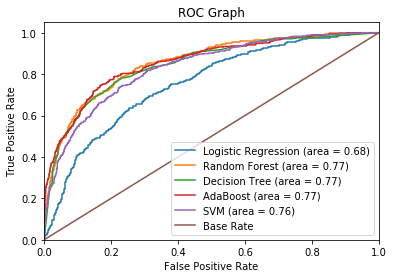

In [56]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_reg_auc_score)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc_score)

# # Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_auc_score)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_auc_score)

# Plot SVM ROC
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % svm_auc_score)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

## Visualize Decision Tree Feature Importance


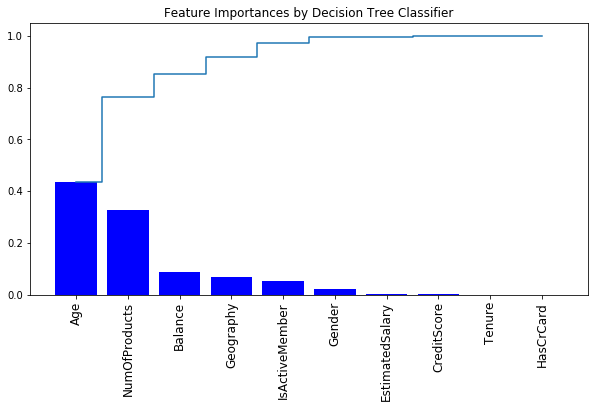

In [57]:
# Plot Decision Tree feature importance

importances = dt.feature_importances_
feature_names = df.drop(['Surname','Exited', 'CustomerId'], axis=1).columns

indices = np.argsort(importances)[::-1]

# Create plot
plt.figure(figsize=(10,5))

# Create plot title
plt.title("Feature Importances by Decision Tree Classifier")

# Add bars
plt.bar(range(len(indices)), importances[indices], color='blue', align='center')

# Add step
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')

# Add feature names as x-axis labels
plt.xticks(range(len(indices)), feature_names[indices], rotation='vertical', fontsize = 12)

# Show plot
plt.show()

# 5. Interpreting the Data
---

## Summary 
---

To recap what we have ascertained so far about bank customers from the data:  

- There are twice as many customers from France than from Spain or Germany.
- France had the highest female and male customers.
- Germany had the most customers who exited followed by France and Spain.
- A higher number of female customers exited; France had the highest number of female customers who exited the bank and Germany had the highest number of Male customers who exited the bank.
- There is no significant difference in the distribution of both gender's credit scores
- Customers who exited had a roughly lower average credit score.
- Customers who had a credit card exited more than customers who did not own a credit card.
- The age distribution of customers who exited looks close to normally distributed while the age distribution of customers who did not exit is positvely skewed.
- The majority of the people who exited were between 40 and 60 years old.

With all of this information, we can ask further questions of the data and explore questions such as: 
- Why are more female customers leaving the bank? 
- Are customers with credit cards moving their business to other banks with better rates? 
- Why are customers in the 40 years - 60 years age range exiting the bank? 
- Does the bank have a bigger market in France than Spain and Germany based on their customers? 

## Potential Solutions
---- 

Now that we have our model and we can predict a customer exiting or not, how do we use that information to positively impact the bank’s business? It is important that rather than just predicting if the bank customer will exit the bank or not, we would rather have an estimate of the probability that the customer will exit the bank or not. We could rank the customers by their probability of leaving, and allocate an incentive budget to the highest probabilities in hopes of retaining them. 

We can run into two sorts of problems with this approach. Firstly, consider that the customer is given incentives by the bank because they think the customer will leave at the end of the month, but in reality the customer doesn’t leave. This is called a false positive and this mistake could be expensive, inconvenient and time consuming for all parties. It is not all negative though as it can be seen as a good investment for relational growth between the bank and the customer. 

The opposite scenario would be where the bank does not provide any incentive offer to the customer and they do leave. This is called a false negative and this error is more costly because the bank lost a customer, which translates to lost revenue for the bank. It also means that the more false negative cases the bank endures, the more it will have to spend on its marketing to attract new customers. Depending on these errors, the different costs are weighed based on the type of customer being treated. If it is a high-net worth customer then the loss is greater than losing a low-net worth customer. Hence, the cost for each error is different and this should be taken into account. 

**Solution 1:** 
- We can rank the customers by their probability of leaving the bank and set aside a budget to incentivize those customers not to leave the bank. 
- Flipping this approach around, we can rank the customers by highest expected loss to the bank if they lose their business and reach out to those customers. 


**Solution 2:** Provide training to the bank staff to improve their customer services. Track and measure their performances using analytics. Some ways to improve customer services include: 
- Empowering employees
- Allow consumers to self-service
- Stay consistent across all touch points
- Educate customers on financial literacy
- Embrace financial technology
- Become an advisor, not just a lender, for small businesses
- Segment your client base and create personalized customer experiences
- Keep iterating on processes 

----

## Where do we go from here? 
--- 

This problem is about equipping the bank with actionable knowledge regarding their customers. When modeling the data, we should not use the predictive metric as our final solution. Instead, we should use the information we get from modeling and arm the bank staff so they can carry out informed decision making. 

Another thing the bank could do is start collecting more data on more features for e.g. how long the customer has been with the bank, satisfaction score with the bank etc. These things might help us improve our model, especially collecting more data as this bank customer dataset was relatively small. Once we have more data, we can go back and improve our predictions as well as gain further insights to see if anything has changed now that we have more customer information.

After our attempts to understand why customers are leaving the bank, we can flip the problem around and ask ourselves:
- What features contribute most to customers retaining their services with the bank? 
- What features cause customers not to quit?
- What is the most valued thing about the bank by the customers?

